1. Load data


In [1]:
#Libraries needed
import numpy as np
import pandas as pd
import h5py 
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:

primary = "iron"
size = 560 #detector radius, area: 1km^2

if (primary=="gamma"):
    filename_train = "photon_alt5200m_qgsii_fluka_r560m_3PMTs.h5"
    particle = "Gamma"
elif (primary=="proton"):
    filename_train = "proton_alt5200m_qgsii_fluka_r560m_3PMTs.h5"
    particle = "Proton"
elif (primary=="iron"):
    filename_train = "iron_alt5200m_qgsii_fluka_r560m_3PMTs.h5"
    particle = "Iron"


In [3]:
#Read data
f = h5py.File(filename_train, mode = "r")

In [4]:
#Look at the keys
list(f.keys())

['data', 'info']

In [5]:
dset = f['data']
dset.shape
#We have these dimensions

(29974, 283, 283)

In [6]:
info = f['info']
list(info.keys())
#We have these elements

['axis0', 'axis1', 'block0_items', 'block0_values']

In [7]:
#Read data
group = f["data"]

#Showers parameters
InfoDF = pd.read_hdf(filename_train, key = "info")
ID_showers = InfoDF.iloc[:,0].values
E0_train = InfoDF.iloc[:,1].values
theta0_train = InfoDF.iloc[:,2].values
Nmuons_train = InfoDF.iloc[:,3].values

#Read input for the algorithm
#X_train: channel1 -> e.m. energy, channel2 -> particles, channel3 -> muons
X_train = group[()]
Y_train = InfoDF.iloc[:,-1].values

#Close file
#f.close()

In [8]:
X_train.shape


(29974, 283, 283)

In [9]:
list(info['axis0'].attrs)

['CLASS', 'FLAVOR', 'TITLE', 'VERSION', 'kind', 'name', 'transposed']

In [10]:
list(info['axis1'].attrs)

['CLASS', 'FLAVOR', 'TITLE', 'VERSION', 'kind', 'name', 'transposed']

In [11]:
list(info['block0_items'].attrs)

['CLASS', 'FLAVOR', 'TITLE', 'VERSION', 'kind', 'name', 'transposed']

In [12]:
list(info['block0_values'].attrs)


['CLASS', 'FLAVOR', 'TITLE', 'VERSION', 'transposed']

We convert h5 to csv to work easily

In [13]:
table=np.array([ID_showers, E0_train, theta0_train, Nmuons_train, Y_train])

In [14]:
np.savetxt("datos_iron.csv",table.transpose(),delimiter=',',header="ID_shower,E0,theta0,Nmuons,Class",fmt='%10.5f',comments='')

In [15]:
#Join data

datos_gamma = "datos_gamma.csv"
datos_proton = "datos_proton.csv"
datos_iron = "datos_iron.csv"

df = pd.concat(map(pd.read_csv, [datos_gamma, datos_proton, datos_iron]), ignore_index=True)
print(df)
np.savetxt("df.csv",df,delimiter=',',header="ID_shower,E0,theta0,Nmuons,Class",fmt='%10.5f',comments='')

       ID_shower           E0  theta0  Nmuons  Class
0         3955.0  59929.85938     0.0    37.0    2.0
1         3956.0  62980.64844     0.0    55.0    2.0
2         3957.0  47523.89844     0.0    22.0    2.0
3         3958.0  62962.07031     0.0    29.0    2.0
4         3959.0  57221.73047     0.0    43.0    2.0
...          ...          ...     ...     ...    ...
93254    23347.0  35235.33984     0.0   909.0    0.0
93255    23348.0  31191.86914     0.0   721.0    0.0
93256    23349.0  30724.74023     0.0   750.0    0.0
93257    23350.0  35846.42969     0.0   764.0    0.0
93258    23351.0  32354.24023     0.0   930.0    0.0

[93259 rows x 5 columns]


2. Plots

(array([10615.,  5007.,  3424.,  2535.,  1980.,  1660.,  1399.,  1212.,
         1122.,  1020.]),
 array([ 5011.89990234, 14510.34428711, 24008.78867188, 33507.23305664,
        43005.67744141, 52504.12182617, 62002.56621094, 71501.0105957 ,
        80999.45498047, 90497.89936523, 99996.34375   ]),
 <BarContainer object of 10 artists>)

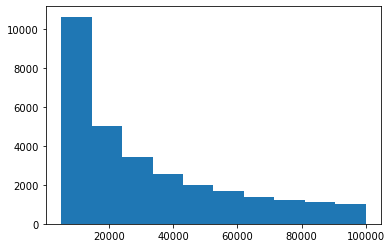

In [16]:
plt.hist(E0_train)

(array([    0.,     0.,     0.,     0.,     0., 29974.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

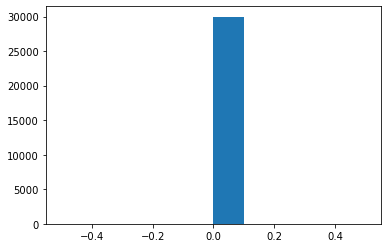

In [17]:
plt.hist(theta0_train)

(array([8.973e+03, 6.723e+03, 4.367e+03, 3.194e+03, 2.537e+03, 2.024e+03,
        1.437e+03, 6.050e+02, 1.080e+02, 6.000e+00]),
 array([  54. ,  325.9,  597.8,  869.7, 1141.6, 1413.5, 1685.4, 1957.3,
        2229.2, 2501.1, 2773. ]),
 <BarContainer object of 10 artists>)

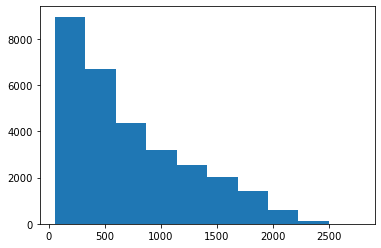

In [18]:
plt.hist(Nmuons_train)

(array([    0.,     0.,     0.,     0.,     0., 29974.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

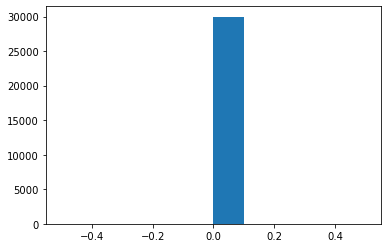

In [19]:
plt.hist(Y_train)

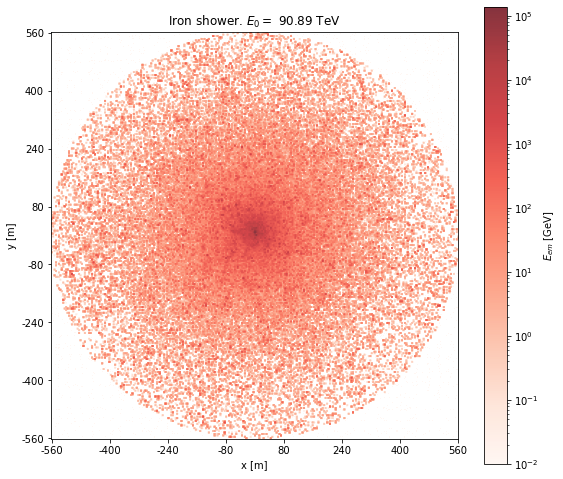

In [20]:

index_to_use = np.where(E0_train>90000)[0][0]
label = "$E_{em}$ [GeV]"


index_to_use = np.where(E0_train>50000)[0][1]
#Plot to see matrix with colors
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
#plt.imshow(X_train[index_to_use,:,:,0], alpha=0.8, cmap='Reds',norm=mpl.colors.LogNorm())
plt.imshow(X_train[index_to_use,:,:], alpha=0.8, cmap='Reds',norm=mpl.colors.LogNorm())
cbar = plt.colorbar()
cbar.ax.set_ylabel(label, rotation=90)
plt.autoscale(enable=True)
plt.title(str(particle)+" shower. $E_0 =$ "+str(np.round((10**-3)*E0_train[index_to_use],2))+" TeV")
plt.xlabel("x [m]")
plt.xticks(ticks = np.linspace(0,X_train.shape[1]-1,8), labels=np.linspace(-size,size,8).astype(int))
plt.ylabel('y [m]')
plt.yticks(ticks = np.linspace(0,X_train.shape[2]-1,8), labels=-1*np.linspace(-size,size,8).astype(int))
plt.locator_params(axis='y', nbins=8)
plt.locator_params(axis='x', nbins=8)
fig.tight_layout()
filename = './figs/'+str(primary)+'_id'+str(index_to_use)+'.pdf'
plt.savefig(filename)



3. EDA

In [21]:
df = pd.read_csv("df.csv",delimiter=',')
 
print(df)

       ID_shower           E0  theta0  Nmuons  Class
0         3955.0  59929.85938     0.0    37.0    2.0
1         3956.0  62980.64844     0.0    55.0    2.0
2         3957.0  47523.89844     0.0    22.0    2.0
3         3958.0  62962.07031     0.0    29.0    2.0
4         3959.0  57221.73047     0.0    43.0    2.0
...          ...          ...     ...     ...    ...
93254    23347.0  35235.33984     0.0   909.0    0.0
93255    23348.0  31191.86914     0.0   721.0    0.0
93256    23349.0  30724.74023     0.0   750.0    0.0
93257    23350.0  35846.42969     0.0   764.0    0.0
93258    23351.0  32354.24023     0.0   930.0    0.0

[93259 rows x 5 columns]


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93259 entries, 0 to 93258
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID_shower  93259 non-null  float64
 1   E0         93259 non-null  float64
 2   theta0     93259 non-null  float64
 3   Nmuons     93259 non-null  float64
 4   Class      93259 non-null  float64
dtypes: float64(5)
memory usage: 3.6 MB


In [23]:
df.shape

(93259, 5)

In [24]:
df.describe()
#Vertical showers, theta0 = 0 always

,ID_shower,E0,theta0,Nmuons,Class
count,93259.000000,93259.000000,93259.0,93259.000000,93259.000000
mean,15582.040414,23495.350051,0.0,336.459537,1.035653
std,9043.360062,33955.054387,0.0,465.538925,0.822923
min,0.000000,10.000000,0.0,0.000000,0.000000
25%,7771.000000,1766.820010,0.0,2.000000,0.000000
50%,15543.000000,9462.730470,0.0,129.000000,1.000000
75%,23314.000000,31816.919925,0.0,490.000000,2.000000
max,33298.000000,251157.484380,0.0,3294.000000,2.000000


In [25]:
df.isnull( ).sum( )

ID_shower    0
E0           0
theta0       0
Nmuons       0
Class        0
dtype: int64

In [26]:
df.nunique( )

ID_shower    33299
E0           87942
theta0           1
Nmuons        2279
Class            3
dtype: int64

In [27]:
df.corr( )
#Correlation Nmuons-class

,ID_shower,E0,theta0,Nmuons,Class
ID_shower,1.000000,-0.009268,NaN,-0.029852,0.076913
E0,-0.009268,1.000000,NaN,0.581283,-0.166482
theta0,NaN,NaN,NaN,NaN,NaN
Nmuons,-0.029852,0.581283,NaN,1.000000,-0.626564
Class,0.076913,-0.166482,NaN,-0.626564,1.000000


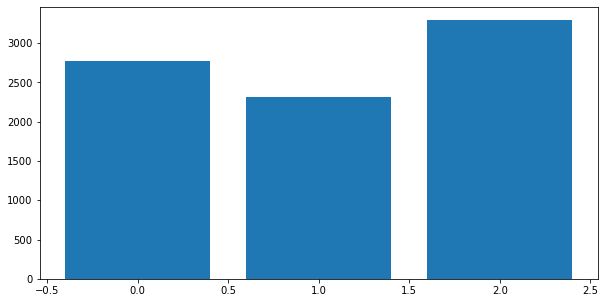

In [28]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df['Class'], df['Nmuons'])
plt.show()